In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, neural_network,preprocessing, metrics

In [37]:
#Carga de datos
data = pd.read_csv('data.csv') 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data.head()

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11.0,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76.0,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5.0,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5.0,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5.0,NaN,Otro,NaN


In [39]:
data.count

<bound method DataFrame.count of         ID de caso  ... Nombre grupo etnico
0                1  ...                 NaN
1                2  ...                 NaN
2                3  ...                 NaN
3                4  ...                 NaN
4                5  ...                 NaN
...            ...  ...                 ...
138970      139011  ...                 NaN
138971      139012  ...                 NaN
138972      139013  ...                 NaN
138973      139014  ...                 NaN
138974      139015  ...                 NaN

[138975 rows x 21 columns]>

In [40]:
data = data[["atención", "Edad", "Sexo", "Tipo", "Estado","Codigo departamento"]]

In [41]:
data.head()

,atención,Edad,Sexo,Tipo,Estado,Codigo departamento
0,Recuperado,19,F,Importado,Leve,11.0
1,Recuperado,34,M,Importado,Leve,76.0
2,Recuperado,50,F,Importado,Leve,5.0
3,Recuperado,55,M,Relacionado,Leve,5.0
4,Recuperado,25,M,Relacionado,Leve,5.0


In [60]:
data["Sexo"].value_counts(dropna=False)


M    74849
F    64117
f        7
m        2
Name: Sexo, dtype: int64

In [61]:
data["atención"].unique()
data = data.dropna()

In [62]:
data.head()

,atención,Edad,Sexo,Tipo,Estado,Codigo departamento
0,Recuperado,19,F,Importado,Leve,11.0
1,Recuperado,34,M,Importado,Leve,76.0
2,Recuperado,50,F,Importado,Leve,5.0
3,Recuperado,55,M,Relacionado,Leve,5.0
4,Recuperado,25,M,Relacionado,Leve,5.0


In [64]:
data.count()

atención               138572
Edad                   138572
Sexo                   138572
Tipo                   138572
Estado                 138572
Codigo departamento    138572
dtype: int64

In [65]:
data["atención"].unique()

array(['Recuperado', 'Fallecido', 'Hospital', 'Hospital UCI', 'Casa'],
      dtype=object)

In [66]:
entrada = data[["Edad","Sexo","Tipo", "Estado", "Codigo departamento"]]

In [67]:
salida = data[["atención"]]

In [68]:
entrada.head()

,Edad,Sexo,Tipo,Estado,Codigo departamento
0,19,F,Importado,Leve,11.0
1,34,M,Importado,Leve,76.0
2,50,F,Importado,Leve,5.0
3,55,M,Relacionado,Leve,5.0
4,25,M,Relacionado,Leve,5.0


In [69]:
salida.head()


,atención
0,Recuperado
1,Recuperado
2,Recuperado
3,Recuperado
4,Recuperado


In [72]:
salida["atención"].value_counts(dropna=False)

Recuperado      95781
Casa            29148
Hospital         6824
Fallecido        5777
Hospital UCI     1042
Name: atención, dtype: int64

In [73]:
entrada["Estado"].unique()

array(['Leve', 'Asintomático', 'Fallecido', 'Moderado', 'Grave'],
      dtype=object)

In [74]:
salida["atención"].unique()

array(['Recuperado', 'Fallecido', 'Hospital', 'Hospital UCI', 'Casa'],
      dtype=object)

In [76]:
#Procesar entradas
bins = [0, 10, 18, 35, 60, 75, np.inf]
names = ['<10', '10-18', '18-35', '35-60','60-75', '75+']
entrada["Edad"] = pd.cut(entrada["Edad"], bins, labels=names)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
entrada.head()

,Edad,Sexo,Tipo,Estado,Codigo departamento
0,18-35,F,Importado,Leve,11.0
1,18-35,M,Importado,Leve,76.0
2,35-60,F,Importado,Leve,5.0
3,35-60,M,Relacionado,Leve,5.0
4,18-35,M,Relacionado,Leve,5.0


In [78]:
entrada["Sexo"]=entrada["Sexo"].str.upper()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
entrada["Sexo"].value_counts(dropna=False)


M    74620
F    63952
Name: Sexo, dtype: int64

In [81]:
entrada["Sexo"], etiquetas = pd.factorize(entrada["Sexo"], sort=True)
entrada["Edad"], etiquetas = pd.factorize(entrada["Edad"], sort=True)
entrada["Tipo"], etiquetas = pd.factorize(entrada["Tipo"], sort=True)
entrada["Estado"], etiquetas = pd.factorize(entrada["Estado"], sort=True)
entrada["Codigo departamento"], etiquetas = pd.factorize(entrada["Codigo departamento"], sort=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [82]:
entrada.head()

,Edad,Sexo,Tipo,Estado,Codigo departamento
0,2,0,1,3,3
1,2,1,1,3,26
2,3,0,1,3,0
3,3,1,2,3,0
4,2,1,2,3,0


In [85]:
salida["atención"], etiquetas = pd.factorize(salida["atención"], sort=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
salida.head()

,atención
0,4
1,4
2,4
3,4
4,4


In [88]:
from sklearn.preprocessing import StandardScaler
entrada = StandardScaler().fit_transform(entrada)



In [90]:
entrada

array([[-0.5397015 , -1.08019101,  1.12542615,  0.36178352, -0.55728748],
       [-0.5397015 ,  0.9257622 ,  1.12542615,  0.36178352,  1.95351909],
       [ 0.42323616, -1.08019101,  1.12542615,  0.36178352, -0.88478399],
       ...,
       [-0.5397015 , -1.08019101, -0.38531746,  0.36178352, -0.55728748],
       [ 0.42323616,  0.9257622 , -0.38531746, -2.44265434, -0.55728748],
       [ 0.42323616,  0.9257622 , -0.38531746, -2.44265434, -0.55728748]])

In [93]:
#Binarizar la salida
salida["atención"].value_counts(dropna=False)

4    95781
0    29148
2     6824
1     5777
3     1042
Name: atención, dtype: int64

In [94]:
etiquetas

Index(['Casa', 'Fallecido', 'Hospital', 'Hospital UCI', 'Recuperado'], dtype='object')

In [96]:
SalidaBinarizada = pd.DataFrame(preprocessing.label_binarize(salida.loc[:,'atención'], classes=[0,1,2,3,4]), columns=["Casa", "F", "H",'UCI','C'])

In [97]:
SalidaBinarizada.head()

,Casa,F,H,UCI,C
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [98]:
salidaT = SalidaBinarizada.to_numpy()

In [99]:
salidaT

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [100]:
entrada

array([[-0.5397015 , -1.08019101,  1.12542615,  0.36178352, -0.55728748],
       [-0.5397015 ,  0.9257622 ,  1.12542615,  0.36178352,  1.95351909],
       [ 0.42323616, -1.08019101,  1.12542615,  0.36178352, -0.88478399],
       ...,
       [-0.5397015 , -1.08019101, -0.38531746,  0.36178352, -0.55728748],
       [ 0.42323616,  0.9257622 , -0.38531746, -2.44265434, -0.55728748],
       [ 0.42323616,  0.9257622 , -0.38531746, -2.44265434, -0.55728748]])

In [101]:
#Partir en datos de entrenamiento y prueba
from sklearn import model_selection, neural_network,preprocessing, metrics
X_train, X_test, y_train, y_test = model_selection.train_test_split(entrada, salidaT, test_size=0.8, random_state=42)

In [102]:
clf = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=1)


In [103]:
clf.fit(X_train, y_train) 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [104]:
print("Precisión", clf.score(X_test, y_test))

Precisión 0.8103249201681431


In [111]:
yhat = clf.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import itertools

In [110]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [112]:
etiquetas

Index(['Casa', 'Fallecido', 'Hospital', 'Hospital UCI', 'Recuperado'], dtype='object')

In [117]:
# Compute confusion matrix
yhat


array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [118]:
y_test

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [120]:
 confusion_matrix(y_test.argmax(axis=1), yhat.argmax(axis=1))

array([[ 6667,     0,     0,     0, 16542],
       [    0,  4614,     0,     0,     0],
       [   50,     0,  5404,     0,     6],
       [   20,     0,     0,   832,     1],
       [ 3030,     0,  1024,    26, 72642]])

              precision    recall  f1-score   support

           0       0.68      0.29      0.40     23209
           1       1.00      1.00      1.00      4614
           2       0.84      0.99      0.91      5460
           3       0.97      0.98      0.97       853
           4       0.81      0.95      0.88     76722

    accuracy                           0.81    110858
   macro avg       0.86      0.84      0.83    110858
weighted avg       0.80      0.81      0.78    110858

Confusion matrix, without normalization
[[ 6667     0     0     0 16542]
 [    0  4614     0     0     0]
 [   50     0  5404     0     6]
 [   20     0     0   832     1]
 [ 3030     0  1024    26 72642]]


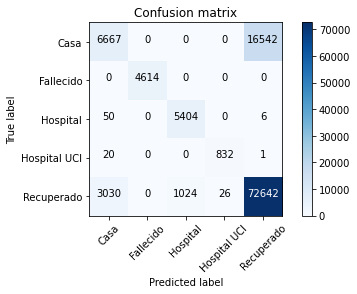

In [121]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), yhat.argmax(axis=1))
np.set_printoptions(precision=3)

print (classification_report(y_test.argmax(axis=1), yhat.argmax(axis=1)))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Casa', 'Fallecido', 'Hospital', 'Hospital UCI', 'Recuperado'],normalize= False,  title='Confusion matrix')